## Importing Necessary Libraries

In [40]:
import joblib
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, StandardScaler

## Feature Engineering

* Check correlation

In [41]:
full_df = pd.read_excel("../data/dataset_v2.xlsx", index_col = "Loan_ID")
full_df.shape

(611, 18)

In [42]:
full_df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender,Married,Self_Employed,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Credit_History,Loan_Status
Loan_ID,,,,,,,,,,,,,,,,,,
LP001002,0.073496,-0.555746,-3.376631e-16,0.275516,1,0,0,True,False,False,False,True,False,False,False,True,1,1
LP001003,-0.133510,-0.040955,-2.182381e-01,0.275516,1,1,0,False,True,False,False,True,False,True,False,False,1,0
LP001005,-0.392350,-0.555746,-9.548270e-01,0.275516,1,1,1,True,False,False,False,True,False,False,False,True,1,1
LP001006,-0.460534,0.249212,-3.132818e-01,0.275516,1,1,0,True,False,False,False,False,True,False,False,True,1,1
LP001008,0.098187,-0.555746,-6.379206e-02,0.275516,1,0,0,True,False,False,False,True,False,False,False,True,1,1


<Axes: >

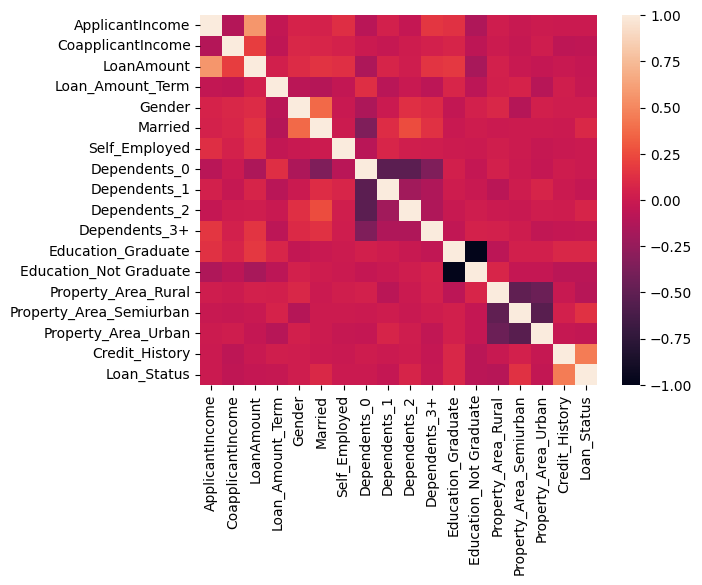

In [43]:
sns.heatmap(full_df.corr())

## Feature Generation


1. **Total Income**: Combine `ApplicantIncome` and `CoapplicantIncome` to create a new feature representing the total income of the applicant and co-applicant.

2. **Loan Amount to Total Income Ratio**: Calculate the ratio of `LoanAmount` to the total income to assess the loan amount in relation to the applicant's financial situation.

3. **Dependents Ratio**: Convert `Dependents` into a numerical feature representing the ratio of dependents to the total number of family members (applicant + co-applicant).

4. **Income Stability**: Calculate the standard deviation or coefficient of variation of `ApplicantIncome` and `CoapplicantIncome` to represent income stability.


## import our cleaned_df

In [44]:
cleaned_df = pd.read_excel('../data/dataset_v1.xlsx', index_col = "Loan_ID")
cleaned_df.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,146.369492,360,1,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360,1,Rural,N


### Total Income

`total_income = applicant_income + coapplicant_income`

In [45]:
total_income = cleaned_df['ApplicantIncome'] + cleaned_df['CoapplicantIncome']

### Loan Amount to Total Income Ratio

`loan_amt_to_total_income_ratio = LoanAmt / total_income`

In [46]:
loan_amt_to_total_income_ratio = cleaned_df['LoanAmount'] / total_income

### Dependents Ratio

`dependents_ratio = (dependents / (dependents+1)`

In [47]:
dependents = cleaned_df['Dependents'].replace('3+', 3).astype(float)

total_family_members = dependents + 1

# Calculate Dependents Ratio
dependents_ratio = dependents / total_family_members

/var/folders/p6/_0cgfkqx493bf1gypgmscvmr0000gn/T/ipykernel_3714/3236854274.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dependents = cleaned_df['Dependents'].replace('3+', 3).astype(float)


### Income Stability

* `ApplicantIncomeStd = ApplicantIncome.std()`

* `CoapplcantIncomeStd = CoapplicantIncome.std()` 

In [48]:
new_columns = {
    'TotalIncome': total_income,
    'LoanAmtToTotalIncomeRatio': loan_amt_to_total_income_ratio,
    'DependentsRatio': dependents_ratio 
}

new_columns_df = pd.DataFrame(new_columns)
new_columns_df.sample(20)

,TotalIncome,LoanAmtToTotalIncomeRatio,DependentsRatio
Loan_ID,,,
LP001432,2957.0,0.027393,0.666667
LP002239,3946.0,0.033452,0.000000
LP002877,4014.0,0.026657,0.500000
LP001238,7100.0,0.017606,0.750000
LP002161,4723.0,0.017150,0.500000
LP002820,7977.0,0.026451,0.000000
LP001884,4436.0,0.020289,0.500000
LP001974,5000.0,0.026400,0.000000
LP001541,6000.0,0.026667,0.500000


In [49]:
new_col_std = StandardScaler()
new_col_std.fit(new_columns_df)
joblib.dump(new_col_std, open('models_and_encoders/new_col_scaler.joblib', 'wb'))
new_columns_scaled = new_col_std.transform(new_columns_df)

In [50]:
new_columns_scaled_df = pd.DataFrame(data = new_columns_scaled, index = new_columns_df.index, columns = new_columns_df.columns)

In [51]:
new_columns_scaled_df.head()

,TotalIncome,LoanAmtToTotalIncomeRatio,DependentsRatio
Loan_ID,,,
LP001002,-0.182240,0.114833,-0.825068
LP001003,-0.144818,-0.334007,0.784671
LP001005,-0.622808,-0.223715,-0.825068
LP001006,-0.322653,0.032217,-0.825068
LP001008,-0.158890,-0.055823,-0.825068


In [52]:
new_columns_scaled_df.isna().sum()

TotalIncome                  0
LoanAmtToTotalIncomeRatio    0
DependentsRatio              0
dtype: int64

In [53]:
all(full_df.index == new_columns_scaled_df.index)

True

In [54]:
full_df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender,Married,Self_Employed,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Credit_History,Loan_Status
Loan_ID,,,,,,,,,,,,,,,,,,
LP001002,0.073496,-0.555746,-3.376631e-16,0.275516,1,0,0,True,False,False,False,True,False,False,False,True,1,1
LP001003,-0.133510,-0.040955,-2.182381e-01,0.275516,1,1,0,False,True,False,False,True,False,True,False,False,1,0
LP001005,-0.392350,-0.555746,-9.548270e-01,0.275516,1,1,1,True,False,False,False,True,False,False,False,True,1,1
LP001006,-0.460534,0.249212,-3.132818e-01,0.275516,1,1,0,True,False,False,False,False,True,False,False,True,1,1
LP001008,0.098187,-0.555746,-6.379206e-02,0.275516,1,0,0,True,False,False,False,True,False,False,False,True,1,1


In [55]:
full_df_engineered = pd.concat([new_columns_scaled_df, full_df], axis = 1)
full_df_engineered.sample(10)

,TotalIncome,LoanAmtToTotalIncomeRatio,DependentsRatio,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender,Married,Self_Employed,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Credit_History,Loan_Status
Loan_ID,,,,,,,,,,,,,,,,,,,,,
LP002337,-0.623581,-0.443833,-0.825068,-0.393167,-0.555746,-1.026110,0.275516,0,0,0,...,False,False,False,True,False,False,False,True,1,1
LP002990,-0.378014,0.562049,-0.825068,-0.133510,-0.555746,-0.158836,0.275516,0,0,1,...,False,False,False,True,False,False,True,False,0,0
LP001073,-0.272395,-0.348098,1.321250,-0.191884,-0.200718,-0.432086,0.275516,1,1,0,...,False,True,False,False,True,False,False,True,1,1
LP001038,-0.331003,0.359994,-0.825068,-0.083802,-0.555746,-0.158836,0.275516,1,1,0,...,False,False,False,False,True,True,False,False,1,0
LP001391,0.101832,-0.472618,-0.825068,-0.298821,0.848663,0.066893,0.275516,1,1,0,...,False,False,False,False,True,True,False,False,0,0
LP002342,2.253485,-1.447664,1.321250,-0.621267,6.271713,1.100494,0.275516,1,1,1,...,False,True,False,True,False,False,False,True,1,0
LP002625,-0.532653,0.312775,-0.825068,-0.297022,-0.555746,-0.598413,0.275516,1,0,0,...,False,False,False,True,False,False,False,True,1,0
LP002606,-0.598220,0.857012,-0.825068,-0.366351,-0.555746,-0.550891,0.275516,0,0,0,...,False,False,False,True,False,False,True,False,1,1
LP002821,-0.189818,-0.138804,-0.825068,0.065484,-0.555746,-0.170716,0.275516,1,0,1,...,False,False,False,False,True,False,True,False,1,1


<Axes: >

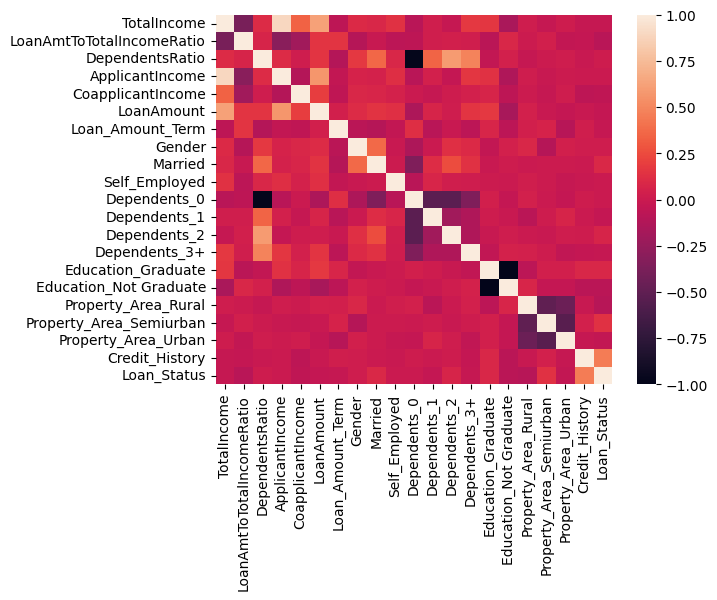

In [57]:
sns.heatmap(full_df_engineered.corr())

In [59]:
full_df_engineered.to_excel('../data/dataset_v3.xlsx', index=None)